  **Assignment No: 10**    
Name: Temgire Vaishnav Kalidas        
Roll No: 23107127

Batch : B

Title : Text mining: Implement a text mining model to analyze customer reviews and identify sentiments
(positive, negative, neutral) and preferences using techniques like sentiment analysis and keyword
extraction.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", engine='python', on_bad_lines='warn')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [13]:
df.ndim

2

In [14]:
df.shape

(23486, 11)

In [15]:
df.size

258346

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [17]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [18]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [19]:
df = df.dropna()
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [20]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

/tmp/ipython-input-3821297090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Unnamed: 0'], inplace = True)


In [21]:
print(df.columns)

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [22]:
df = df.head(10000)
print("Total Records:", len(df))
df.head()

Total Records: 10000


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [23]:
# Text Cleaning using Regex
import re

def clean_text(text):
  text = text.lower()
  text = re.sub(r'http\S+', "", text)
  text = re.sub(r'[^a-z\s]', "", text)
  text = re.sub(r'\s+', " ", text)
  return text.strip()

In [24]:
df['clean_review'] = df['Review Text'].apply(clean_text)
df[['Review Text' , 'clean_review']].head()

/tmp/ipython-input-3931474453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['Review Text'].apply(clean_text)


,Review Text,clean_review
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...


In [25]:
#tokenization using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_process(text):
    doc = nlp(text)
    tokens = []

    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)

    return " ".join(tokens)

df['spacy_review'] = df['clean_review'].apply(spacy_process)
df[['clean_review','spacy_review']].head()

/tmp/ipython-input-2223227556.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spacy_review'] = df['clean_review'].apply(spacy_process)


,clean_review,spacy_review
2,i had such high hopes for this dress and reall...,high hope dress want work initially order peti...
3,i love love love this jumpsuit its fun flirty ...,love love love jumpsuit fun flirty fabulous ti...
4,this shirt is very flattering to all due to th...,shirt flattering adjustable tie perfect length...
5,i love tracy reese dresses but this one is not...,love tracy reese dress petite foot tall usuall...
6,i aded this in my basket at hte last mintue to...,ade basket hte mintue look like person store p...


In [26]:
!pip install vaderSentiment

In [27]:
#VADER using Sentiment Analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']

    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['spacy_review'].apply(get_sentiment)
df[['spacy_review','sentiment']].head()

/tmp/ipython-input-1667314258.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['spacy_review'].apply(get_sentiment)


,spacy_review,sentiment
2,high hope dress want work initially order peti...,Positive
3,love love love jumpsuit fun flirty fabulous ti...,Positive
4,shirt flattering adjustable tie perfect length...,Positive
5,love tracy reese dress petite foot tall usuall...,Positive
6,ade basket hte mintue look like person store p...,Positive


In [28]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,9523
Negative,352
Neutral,125


In [30]:
!pip install rake-nltk

In [33]:
#Keyword Extraction using RAKE
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from rake_nltk import Rake

rake = Rake()

def extract_keywords(text):
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()[:5]

df['keywords'] = df['spacy_review'].apply(extract_keywords)
df[['spacy_review','keywords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-1410872014.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['spacy_review'].apply(extract_keywords)


,spacy_review,keywords
2,high hope dress want work initially order peti...,[high hope dress want work initially order pet...
3,love love love jumpsuit fun flirty fabulous ti...,[love love love jumpsuit fun flirty fabulous t...
4,shirt flattering adjustable tie perfect length...,[shirt flattering adjustable tie perfect lengt...
5,love tracy reese dress petite foot tall usuall...,[love tracy reese dress petite foot tall usual...
6,ade basket hte mintue look like person store p...,[ade basket hte mintue look like person store ...


In [34]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=15)
tfidf_matrix = tfidf.fit_transform(df['spacy_review'])

tfidf.get_feature_names_out()

array(['buy', 'color', 'dress', 'fabric', 'fit', 'great', 'like', 'look',
       'love', 'not', 'order', 'perfect', 'size', 'small', 'wear'],
      dtype=object)

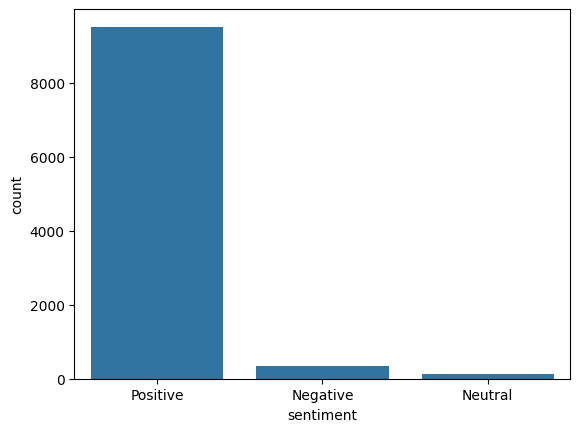

In [35]:
sns.countplot(x='sentiment', data=df)
plt.show()